In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
data = pd.read_csv("/content/diabetes.csv")

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#EDA

In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

It is an imbalanced dataset and so the proper evaluation metrics would be precision, recall, f1 score.

the data is not equally distributed

In [ ]:
X = data.drop(columns = ["Outcome"], axis =1)
y = data['Outcome']

In [ ]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


<Figure size 432x288 with 0 Axes>

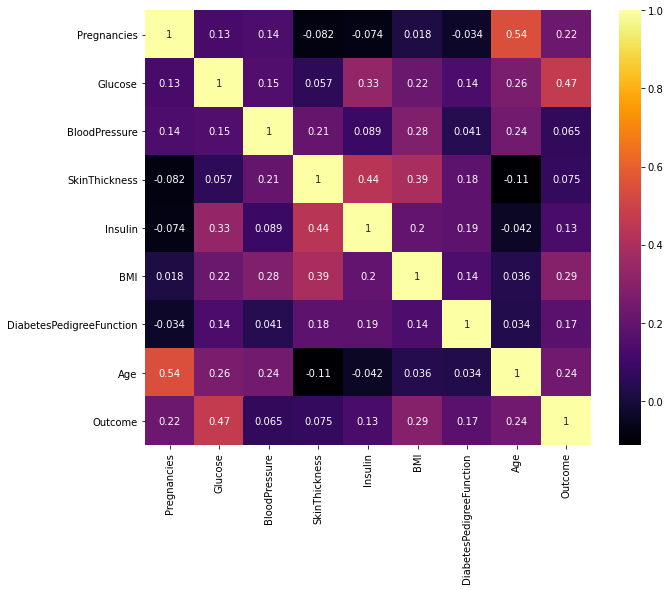

In [ ]:
plt.figure()
plt.figure(figsize = (10,8))
sns.heatmap(data.corr(), cmap = 'inferno', annot = True)

There is very little correlation between the independent features. So, no need to drop any features for multicollinearity.

In [ ]:
def univariate_outlier_detection(column):

  print("\n\n-----------------------  {n}  ------------------------".format(n = column))

  mean = data[column].mean()
  median = data[column].median()
  mode = data[column].mode()

  print("\nMean:", mean, "\nMedian: ", median,"\nMode: ", mode[0])

  Q1 = data[column].quantile(q = 0.25)
  Q3 = data[column].quantile(q = 0.75)
  IQR = stats.iqr(data[column])

  print("\n\n1st quartile: ", Q1)
  print("3rd quartile: ", Q3)
  print("Inter-quartile Range: ", IQR)

  l_outlier_range = Q1 - 1.5*IQR
  u_outlier_range = Q3 + 1.5*IQR
  print("\n\nLower outlier range: ", l_outlier_range)
  print("Upper outlier range: ", u_outlier_range)

  print("\n\nNumber of outlier in upper range: ", data[data[column] > u_outlier_range][column].count())
  print("Number of outlier in lower range: ", data[data[column] < l_outlier_range][column].count())
  print("\n% of outlier in upper range: ", (data[data[column] > u_outlier_range][column].count()*100/len(data)))
  print("% of outlier in lower range: ", (data[data[column] < l_outlier_range][column].count()*100/len(data)))

  #Boxplot
  print("Boxplot of column " + column)
  plt.figure()
  ax = sns.boxplot(x = data[column])

  plt.show()

In [ ]:
columns = X.columns



-----------------------  Pregnancies  ------------------------

Mean: 3.8450520833333335 
Median:  3.0 
Mode:  1


1st quartile:  1.0
3rd quartile:  6.0
Inter-quartile Range:  5.0


Lower outlier range:  -6.5
Upper outlier range:  13.5


Number of outlier in upper range:  4
Number of outlier in lower range:  0

% of outlier in upper range:  0.5208333333333334
% of outlier in lower range:  0.0
Boxplot of column Pregnancies


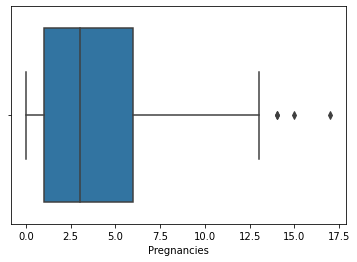



-----------------------  Glucose  ------------------------

Mean: 120.89453125 
Median:  117.0 
Mode:  99


1st quartile:  99.0
3rd quartile:  140.25
Inter-quartile Range:  41.25


Lower outlier range:  37.125
Upper outlier range:  202.125


Number of outlier in upper range:  0
Number of outlier in lower range:  5

% of outlier in upper range:  0.0
% of outlier in lower range:  0.6510416666666666
Boxplot of column Glucose


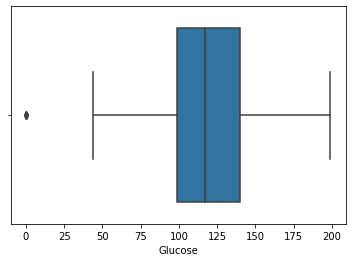



-----------------------  BloodPressure  ------------------------

Mean: 69.10546875 
Median:  72.0 
Mode:  70


1st quartile:  62.0
3rd quartile:  80.0
Inter-quartile Range:  18.0


Lower outlier range:  35.0
Upper outlier range:  107.0


Number of outlier in upper range:  7
Number of outlier in lower range:  38

% of outlier in upper range:  0.9114583333333334
% of outlier in lower range:  4.947916666666667
Boxplot of column BloodPressure


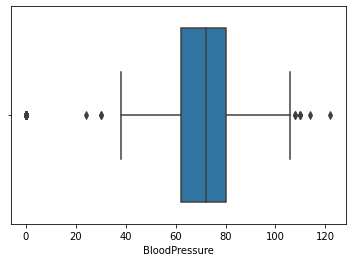



-----------------------  SkinThickness  ------------------------

Mean: 20.536458333333332 
Median:  23.0 
Mode:  0


1st quartile:  0.0
3rd quartile:  32.0
Inter-quartile Range:  32.0


Lower outlier range:  -48.0
Upper outlier range:  80.0


Number of outlier in upper range:  1
Number of outlier in lower range:  0

% of outlier in upper range:  0.13020833333333334
% of outlier in lower range:  0.0
Boxplot of column SkinThickness


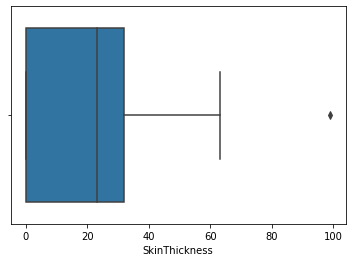



-----------------------  Insulin  ------------------------

Mean: 79.79947916666667 
Median:  30.5 
Mode:  0


1st quartile:  0.0
3rd quartile:  127.25
Inter-quartile Range:  127.25


Lower outlier range:  -190.875
Upper outlier range:  318.125


Number of outlier in upper range:  34
Number of outlier in lower range:  0

% of outlier in upper range:  4.427083333333333
% of outlier in lower range:  0.0
Boxplot of column Insulin


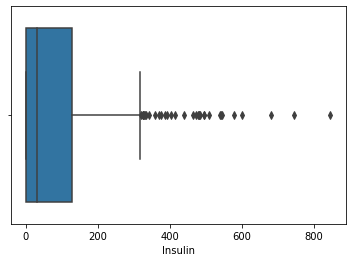



-----------------------  BMI  ------------------------

Mean: 31.992578124999977 
Median:  32.0 
Mode:  32.0


1st quartile:  27.3
3rd quartile:  36.6
Inter-quartile Range:  9.3


Lower outlier range:  13.35
Upper outlier range:  50.550000000000004


Number of outlier in upper range:  8
Number of outlier in lower range:  11

% of outlier in upper range:  1.0416666666666667
% of outlier in lower range:  1.4322916666666667
Boxplot of column BMI


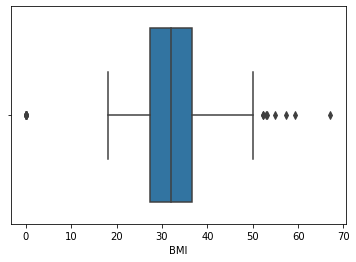



-----------------------  DiabetesPedigreeFunction  ------------------------

Mean: 0.4718763020833327 
Median:  0.3725 
Mode:  0.254


1st quartile:  0.24375
3rd quartile:  0.62625
Inter-quartile Range:  0.38249999999999995


Lower outlier range:  -0.32999999999999996
Upper outlier range:  1.2


Number of outlier in upper range:  29
Number of outlier in lower range:  0

% of outlier in upper range:  3.7760416666666665
% of outlier in lower range:  0.0
Boxplot of column DiabetesPedigreeFunction


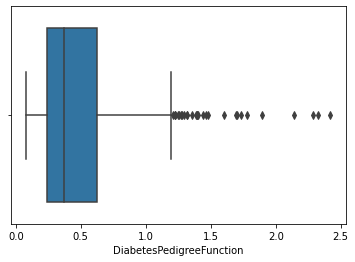



-----------------------  Age  ------------------------

Mean: 33.240885416666664 
Median:  29.0 
Mode:  22


1st quartile:  24.0
3rd quartile:  41.0
Inter-quartile Range:  17.0


Lower outlier range:  -1.5
Upper outlier range:  66.5


Number of outlier in upper range:  9
Number of outlier in lower range:  0

% of outlier in upper range:  1.171875
% of outlier in lower range:  0.0
Boxplot of column Age


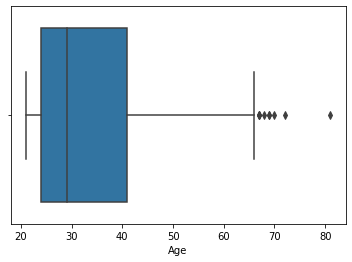

In [ ]:
for i in columns:
  univariate_outlier_detection(i)

In [ ]:
C_data = data.copy()
C_data = C_data.drop(columns = ['Outcome'], axis = 1)
C_data = C_data[(C_data == 0).any(axis = 1)]
C_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
4,0,137,40,35,168,43.1,2.288,33
5,5,116,74,0,0,25.6,0.201,30
...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43
762,9,89,62,0,0,22.5,0.142,33
764,2,122,70,27,0,36.8,0.340,27
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
C_data.style.applymap(lambda x: 'background-color : red' if x ==0 else '')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.600000,0.627000,50
1,1,85,66,29,0,26.600000,0.351000,31
2,8,183,64,0,0,23.300000,0.672000,32
4,0,137,40,35,168,43.100000,2.288000,33
5,5,116,74,0,0,25.600000,0.201000,30
7,10,115,0,0,0,35.300000,0.134000,29
9,8,125,96,0,0,0.000000,0.232000,54
10,4,110,92,0,0,37.600000,0.191000,30
11,10,168,74,0,0,38.000000,0.537000,34
12,10,139,80,0,0,27.100000,1.441000,57


As we can see from above there are many zero values in the dataset particularly in the insulin column. While zero value in the "Pregnancies" column is valid most of the zeors ouccur in the coulumns other than "Pregnancies". So, we are assuming these to be missing values and hence we will try to impute them with median value of their respective coulumn.

###Imputing Zeros(0's) with median value

In [ ]:
pregnancy = X['Pregnancies']
X = X.drop(columns = ['Pregnancies'], axis = 1)

In [ ]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(missing_values = 0, strategy = 'median')
cols = X.columns
X = pd.DataFrame(impute.fit_transform(X))
X.columns = cols

In [ ]:
X.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148.0,72.0,35.0,125.0,33.6,0.627,50.0
1,85.0,66.0,29.0,125.0,26.6,0.351,31.0
2,183.0,64.0,29.0,125.0,23.3,0.672,32.0
3,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,137.0,40.0,35.0,168.0,43.1,2.288,33.0


In [ ]:
columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [ ]:
X = pd.concat([X, pregnancy], axis = 1 )
X = X.reindex(columns = columns)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50.0
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31.0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32.0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33.0


In [ ]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X = pd.DataFrame(scalar.fit_transform(X), columns= columns)

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.504422,-2.679076,0.670643,0.316566,1.549303,5.484909,-0.020496


In [ ]:
from sklearn.model_selection import train_test_split

###Cross-validation and KFold

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
folds = KFold(n_splits= 10, shuffle = False, random_state = 42)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [ ]:
def display_scores(scores):
    
    print("Test mean accuracy: ", scores['test_accuracy'].mean())
    print("Test mean precision: ", scores['test_precision'].mean())
    print("Test mean recall: ", scores['test_recall'].mean())
    print("Test mean f1_score: ", scores['test_f1'].mean())

###Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
Clog_reg = cross_validate(log_reg, X,y, scoring = ['accuracy', 'precision', 'recall', "f1" ], cv = folds)

In [ ]:
display_scores(Clog_reg)

Test mean accuracy:  0.7747265892002735
Test mean precision:  0.7231977671451355
Test mean recall:  0.5683494822171292
Test mean f1_score:  0.6334146764909877


###Support Vector Classifier

In [ ]:
from sklearn.svm import SVC
svc_clf = SVC(C=1.0, kernel = 'rbf', degree = 3)
Csvc_clf = cross_validate(svc_clf, X,y, scoring = ['accuracy', 'precision', 'recall', "f1" ], cv = folds)


In [ ]:
display_scores(Csvc_clf)

Test mean accuracy:  0.7565105946684894
Test mean precision:  0.6941431343587315
Test mean recall:  0.5420521461109696
Test mean f1_score:  0.6036249564387346


###Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()
Ctree_clf = cross_validate(tree_clf, X,y, scoring =['accuracy', 'precision', 'recall', "f1"], cv = folds)

In [ ]:
display_scores(Ctree_clf)

Test mean accuracy:  0.6953178400546821
Test mean precision:  0.5618401973102518
Test mean recall:  0.5846557769572475
Test mean f1_score:  0.567534687083011


###Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier()
Crnd_clf = cross_validate(rnd_clf, X, y, scoring= ['accuracy', 'precision', 'recall', "f1"], cv = folds)

In [ ]:
display_scores(Crnd_clf)

Test mean accuracy:  0.7564422419685577
Test mean precision:  0.6673755199049316
Test mean recall:  0.6057377097303569
Test mean f1_score:  0.6317926785915731


###Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
C_nb = cross_validate(nb, X, y, scoring= ['accuracy', 'precision', 'recall', "f1"], cv = folds)

In [ ]:
display_scores(C_nb)

Test mean accuracy:  0.7487012987012986
Test mean precision:  0.6490475411373586
Test mean recall:  0.5927169064595534
Test mean f1_score:  0.6162885091189818


### Using GridSeaechCV to find the best parameters

In [ ]:
Raw_models = [(LogisticRegression(),[{'C':[0.25,0.5,0.75,1],'random_state':[0]}]),
             (SVC(),[{'C':[0.25,0.5,0.75,1],'kernel':['linear'],'random_state':[0]},{'C':[0.25,0.5,0.75,1],'kernel':['rbf','poly'],'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],'random_state':[0]}]),
             
             (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]),
             (RandomForestClassifier(),[{'n_estimators':[10,100,50,150,200],'criterion':['gini','entropy'],'random_state':[0]}]),
             (GaussianNB(), [{'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 1e-04, 1e-03,1e-02,1e-01]}])]

In [ ]:
from sklearn.model_selection import GridSearchCV

for i,j in Raw_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv = folds)
    grid.fit(X,y)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print('\n{}'.format(i))
    print('\nBest Accuracy : {:.2f}%'.format(best_accuracy*100))
    print('Best Parameters : ',best_param)
    print('\n-------------------------------------------------------------------')


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Best Accuracy : 77.47%
Best Parameters :  {'C': 0.5, 'random_state': 0}

-------------------------------------------------------------------

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Best Accuracy : 76.82%
Best Parameters :  {'C': 0.25, 'kernel': 'linear', 'random_state': 0}

-------------------------------------------------------------------

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, ma